- Nama : Guido Tamara
- NIM : 1301193303
- Kelas : IF-42-GAB03 / IF-43-09

# Import Libraries

In [47]:
import geoplot as gplt
import geopandas as gpd
from geopandas import GeoDataFrame
import geoplot.crs as gcrs
from datetime import datetime
import imageio
import pandas as pd
import pathlib
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np

from IPython.display import Image

%matplotlib inline

pd.options.display.max_rows = 500
pd.options.display.max_columns = 500

# **Inisialisasi Geospasial Map Indonesia (Batas Provinsi)**

In [30]:
map_indonesia = gpd.read_file("Indonesian - Map/INDONESIA_PROP.shp")
map_indonesia.head()

,ID,kode,Propinsi,SUMBER,geometry
0,1,85,IRIAN JAYA TIMUR,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((137.16585 -3.17501 0.00000, ..."
1,2,52,NUSATENGGARA BARAT,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((117.62720 -8.50640 0.00000, ..."
2,3,75,GORONTALO,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((122.18814 1.04530 0.00000, 1..."
3,4,74,SULAWESI TENGGARA,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((120.98423 -2.83534 0.00000, ..."
4,5,34,DAERAH ISTIMEWA YOGYAKARTA,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"POLYGON Z ((110.01183 -7.88690 0.00000, 110.01..."


c:\Anaconda\envs\tugas9visdat\lib\site-packages\geoplot\geoplot.py:885: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


<AxesSubplot:>

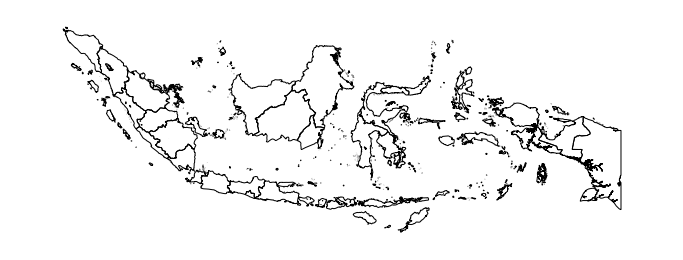

In [31]:
#GeoPlot Map Indonesia
gplt.polyplot(map_indonesia, figsize=(12, 16))

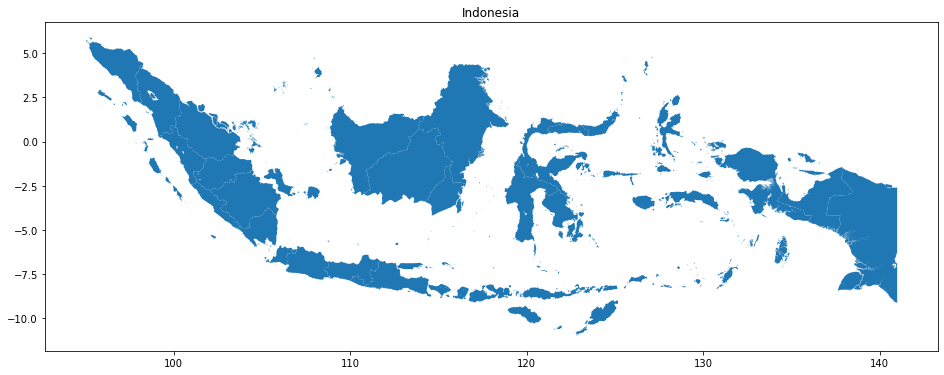

In [32]:
#Plot Map Indonesia
map_indonesia.plot(figsize = (16,18))
plt.title('Indonesia')
plt.show()

# **Import Dataset Covid-19 Indonesia**

**Impor Data Csv - Kasuk Covid 19 Indonesia**

In [33]:
covid_indo = pd.read_csv("covid_19_indonesia_time_series_all.csv") 
covid_indo.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,City or Regency,Province,Country,Continent,Island,Time Zone,Special Status,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,41,-22,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,105.13%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,41,-20,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,100.00%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,2,Country,NaN,NaN,Indonesia,Asia,NaN,NaN,NaN,416,98.0,7230,8488.0,74953.0,1916907,265185520,138.34,113.921327,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,2,0,3,-1,Province,NaN,Riau,Indonesia,Asia,Sumatera,UTC+07:00,NaN,10,2.0,169,268.0,1591.0,87024,6074100,69.80,101.805109,0.511648,0.16,0.33,0.0,0.00,0.00,0.00%,150.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,41,-18,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,95.35%,1.0,1.0


**Filtering Kolom Data Covid Indonesia**

In [34]:
filtered_data = ['Date','Location','New Cases','New Deaths','New Recovered','New Active Cases','Total Cases','Total Deaths','Total Recovered','Total Active Cases']
covid_data = covid_indo[filtered_data]
covid_data = covid_data.apply(lambda x : x.astype(str).str.upper())
covid_data.head()

,Date,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases
0,3/1/2020,DKI JAKARTA,2,0,0,2,39,20,41,-22
1,3/2/2020,DKI JAKARTA,2,0,0,2,41,20,41,-20
2,3/2/2020,INDONESIA,2,0,0,2,2,0,0,2
3,3/2/2020,RIAU,1,0,0,1,2,0,3,-1
4,3/3/2020,DKI JAKARTA,2,0,0,2,43,20,41,-18


In [35]:
#Mengonversi ke jenis nilai yang tepat
numbercases = covid_data.loc[:,"New Cases":"Total Active Cases"].astype(int)
time = pd.DataFrame(covid_data.loc[:,'Date'].apply(pd.to_datetime))
location = pd.DataFrame(covid_data.loc[:,'Location'].astype(str))

**Rekonstruksi Data Covid**

In [36]:
covid_data_final = pd.concat ([time.reset_index(drop=True), location.reset_index(drop=True), numbercases.reset_index(drop=True)],axis=1)
covid_data_final

,Date,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases
0,2020-03-01,DKI JAKARTA,2,0,0,2,39,20,41,-22
1,2020-03-02,DKI JAKARTA,2,0,0,2,41,20,41,-20
2,2020-03-02,INDONESIA,2,0,0,2,2,0,0,2
3,2020-03-02,RIAU,1,0,0,1,2,0,3,-1
4,2020-03-03,DKI JAKARTA,2,0,0,2,43,20,41,-18
...,...,...,...,...,...,...,...,...,...,...
21754,2021-12-02,SULAWESI UTARA,2,0,0,2,34715,1056,33566,93
21755,2021-12-02,SUMATERA BARAT,4,0,0,4,89849,2152,87605,92
21756,2021-12-02,SUMATERA SELATAN,4,0,0,4,59937,3071,56830,36
21757,2021-12-02,SUMATERA UTARA,4,0,1,3,106045,2889,103061,95


In [37]:
#Menggabungkan covid_data_final ke Map_Indonesia
covid_ind = covid_data_final.merge(map_indonesia, how='inner', left_on=['Location'], right_on=['Propinsi'])
covid_ind.head()

,Date,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,ID,kode,Propinsi,SUMBER,geometry
0,2020-03-01,DKI JAKARTA,2,0,0,2,39,20,41,-22,14,31,DKI JAKARTA,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((106.68148 -6.13549 0.00000, ..."
1,2020-03-02,DKI JAKARTA,2,0,0,2,41,20,41,-20,14,31,DKI JAKARTA,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((106.68148 -6.13549 0.00000, ..."
2,2020-03-03,DKI JAKARTA,2,0,0,2,43,20,41,-18,14,31,DKI JAKARTA,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((106.68148 -6.13549 0.00000, ..."
3,2020-03-04,DKI JAKARTA,2,0,0,2,45,20,41,-16,14,31,DKI JAKARTA,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((106.68148 -6.13549 0.00000, ..."
4,2020-03-05,DKI JAKARTA,0,1,0,-1,45,21,41,-17,14,31,DKI JAKARTA,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((106.68148 -6.13549 0.00000, ..."


# **Visualisasi Geospasial (Choropleth Map) 1 Mei 2021**

In [38]:
#Memfilter covid_data_final hanya untuk satu tanggal : 1 May 2021
filtered_data = covid_data_final.loc[covid_data_final['Date']=='2021-05-01']
filtered_data.head()

,Date,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases
14218,2021-05-01,ACEH,124,2,118,4,11169,441,9727,1001
14219,2021-05-01,BALI,142,10,165,-33,44813,1346,42135,1332
14220,2021-05-01,BANTEN,53,0,28,25,47396,1210,44202,1984
14221,2021-05-01,BENGKULU,102,0,40,62,6884,172,5885,827
14222,2021-05-01,DKI JAKARTA,926,15,793,118,409540,6681,395727,7132


In [39]:
#Menggabungkan filtered_data ke Map_Indonesia
covid_indonesia = filtered_data.merge(map_indonesia, how='inner', left_on=['Location'], right_on=['Propinsi'])
covid_indonesia.head()

,Date,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,ID,kode,Propinsi,SUMBER,geometry
0,2021-05-01,BALI,142,10,165,-33,44813,1346,42135,1332,18,51,BALI,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((115.19494 -8.73232 0.00000, ..."
1,2021-05-01,BENGKULU,102,0,40,62,6884,172,5885,827,31,17,BENGKULU,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((103.46781 -4.35304 0.00000, ..."
2,2021-05-01,DKI JAKARTA,926,15,793,118,409540,6681,395727,7132,14,31,DKI JAKARTA,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((106.68148 -6.13549 0.00000, ..."
3,2021-05-01,DAERAH ISTIMEWA YOGYAKARTA,128,4,330,-206,39644,960,34735,3949,5,34,DAERAH ISTIMEWA YOGYAKARTA,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"POLYGON Z ((110.01183 -7.88690 0.00000, 110.01..."
4,2021-05-01,GORONTALO,6,4,49,-47,5400,165,5082,153,3,75,GORONTALO,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((122.18814 1.04530 0.00000, 1..."


Text(0.5, 1.0, 'Sebaran Kasus Positif COVID19 (Total Cases) di Indonesia per Tanggal 1 Mei 2021')

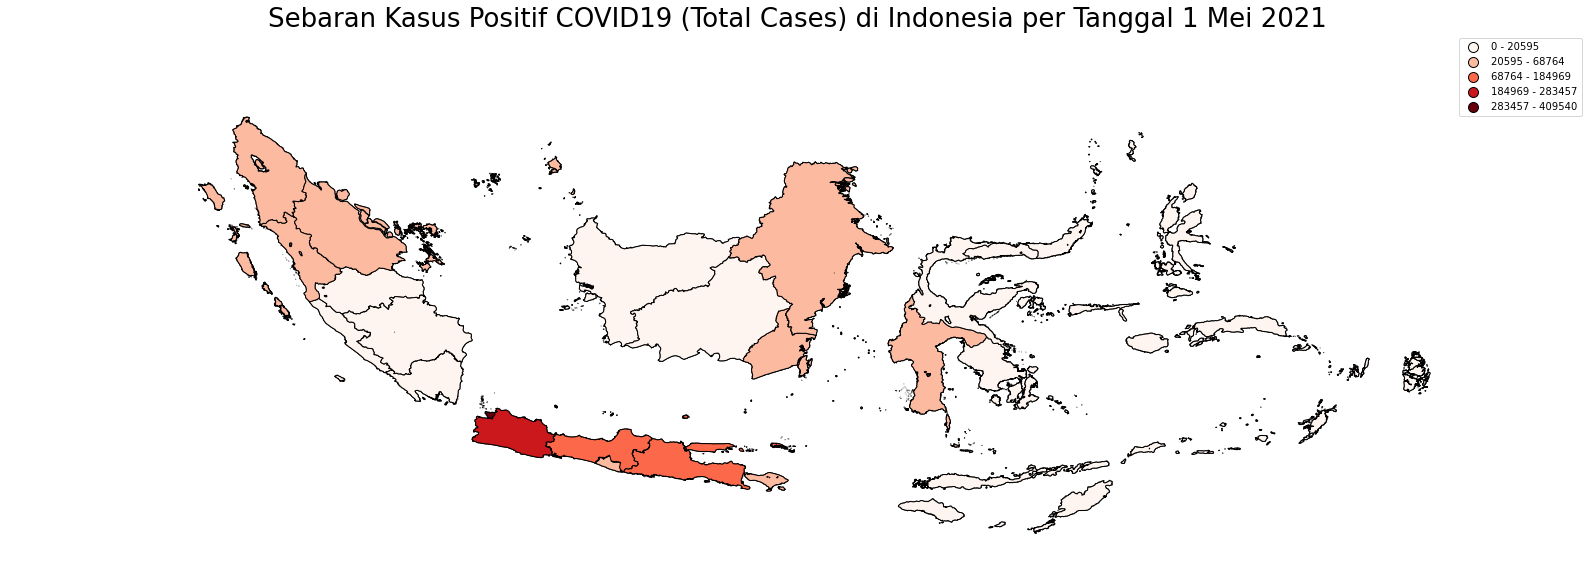

In [40]:
#memvisualisasikan  plot choropleth dari "Total Cases"
covid_indonesia = GeoDataFrame(covid_indonesia)
ax = gplt.polyplot(
    covid_indonesia, 
    facecolor="lightgray",
    figsize=(30, 10),
    projection=gcrs.AlbersEqualArea()
)

gplt.choropleth(
    covid_indonesia,
    hue="Total Cases",
    edgecolor="black",
    linewidth=1,
    cmap="Reds",
    legend=True,
    scheme="FisherJenks",
    projection=gcrs.AlbersEqualArea(),
    ax=ax
)

ax.set_title(
    'Sebaran Kasus Positif COVID19 (Total Cases) di Indonesia per Tanggal 1 Mei 2021',
    fontsize=26
)

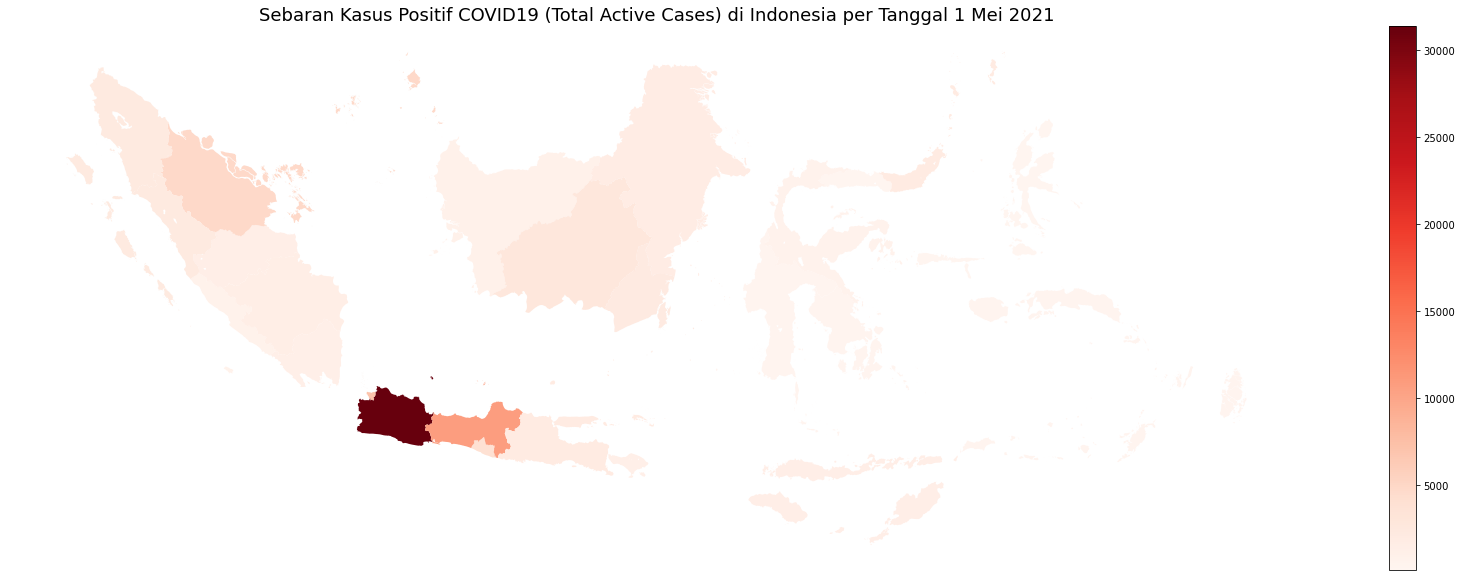

In [41]:
#Mengubah tipe dataset menjadi GeoDataFrame dan memplot Peta dari "Total Active Case"
covid_indonesia.plot(column='Total Active Cases', cmap="Reds", legend=True, figsize = (30,10))
plt.axis('off')
plt.title('Sebaran Kasus Positif COVID19 (Total Active Cases) di Indonesia per Tanggal 1 Mei 2021', fontsize=18)
plt.show()

# **Visualisasi Geospasial (Choropleth Map) Mei - Desember 2021**

In [42]:
#mengganti tanggal ke tahun/bulan
covid_ind["Date"] = pd.to_datetime(covid_ind["Date"])
covid_ind['YearMonth'] = covid_ind['Date'].apply(lambda x:x.strftime('%Y/%m'))

#group by sum kolom Location dan YearMonth reset index
covid_ind= covid_ind.groupby(["Location","YearMonth"]).sum().reset_index()
#merge covid_ind dengan data map_indonesia, join kolom Propinsi
covid19_ind = covid_ind.merge(map_indonesia, how='inner', left_on=['Location'], right_on=['Propinsi'])


In [52]:
#drop baris duplikat & sorting date_set secara asc 
date_set = covid19_ind.YearMonth.drop_duplicates() 
date_set.sort_values(ascending=True, inplace=True) 

#memilih bulan Mei - Desember
date_set = date_set[14:22] 
date_set

14    2021/05
15    2021/06
16    2021/07
17    2021/08
18    2021/09
19    2021/10
20    2021/11
21    2021/12
Name: YearMonth, dtype: object

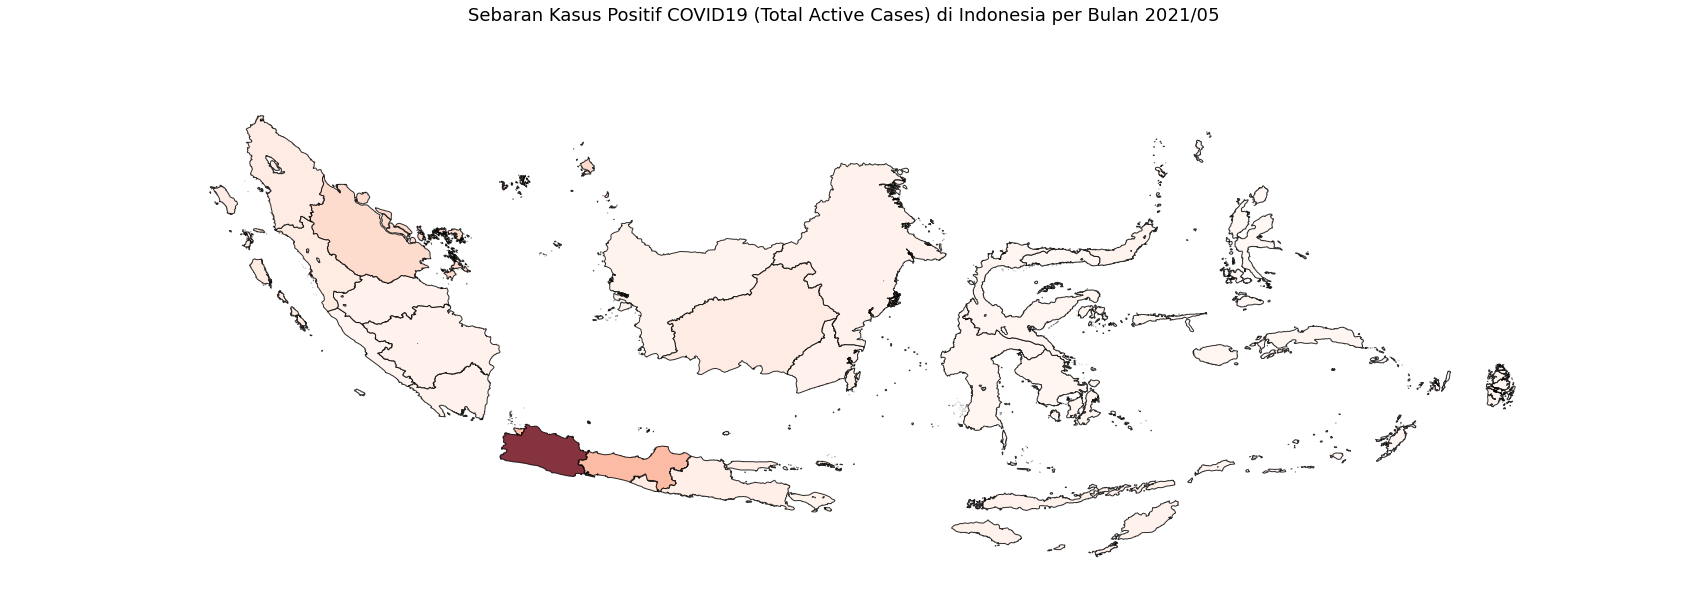

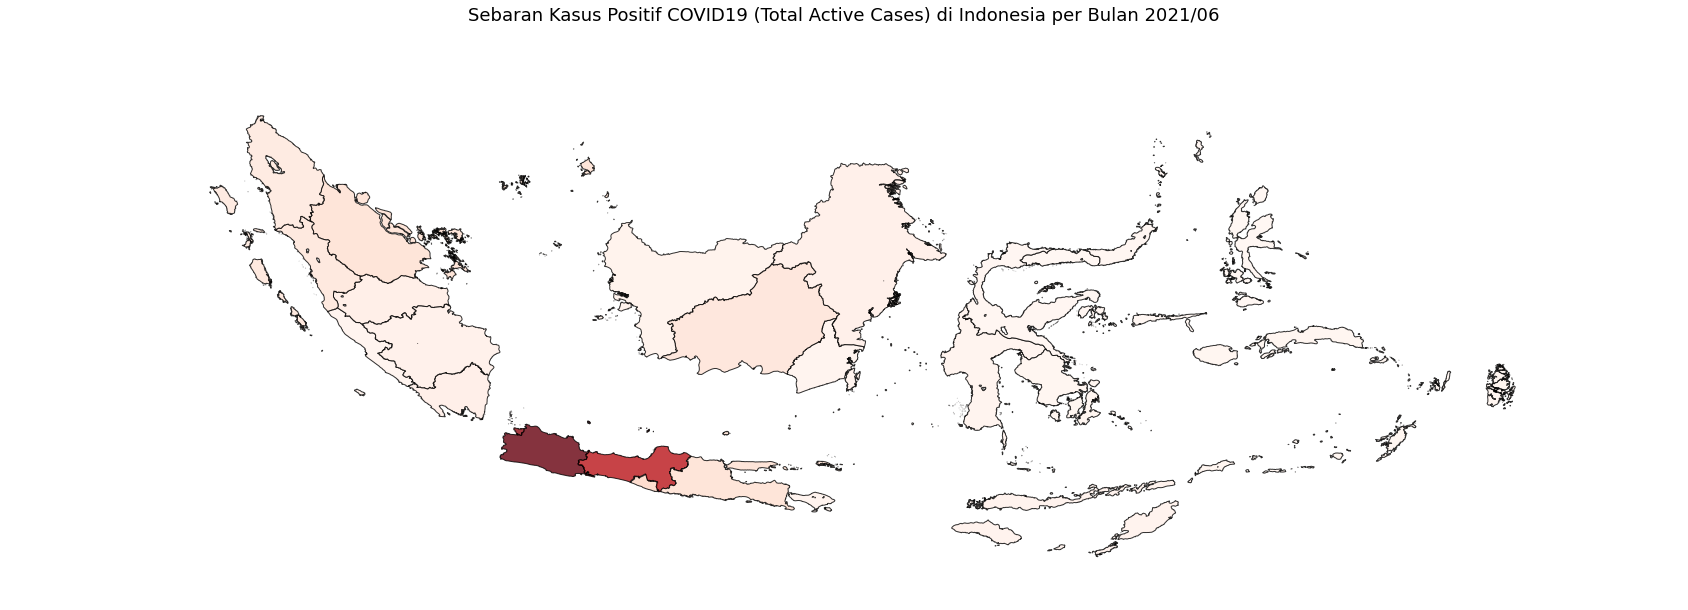

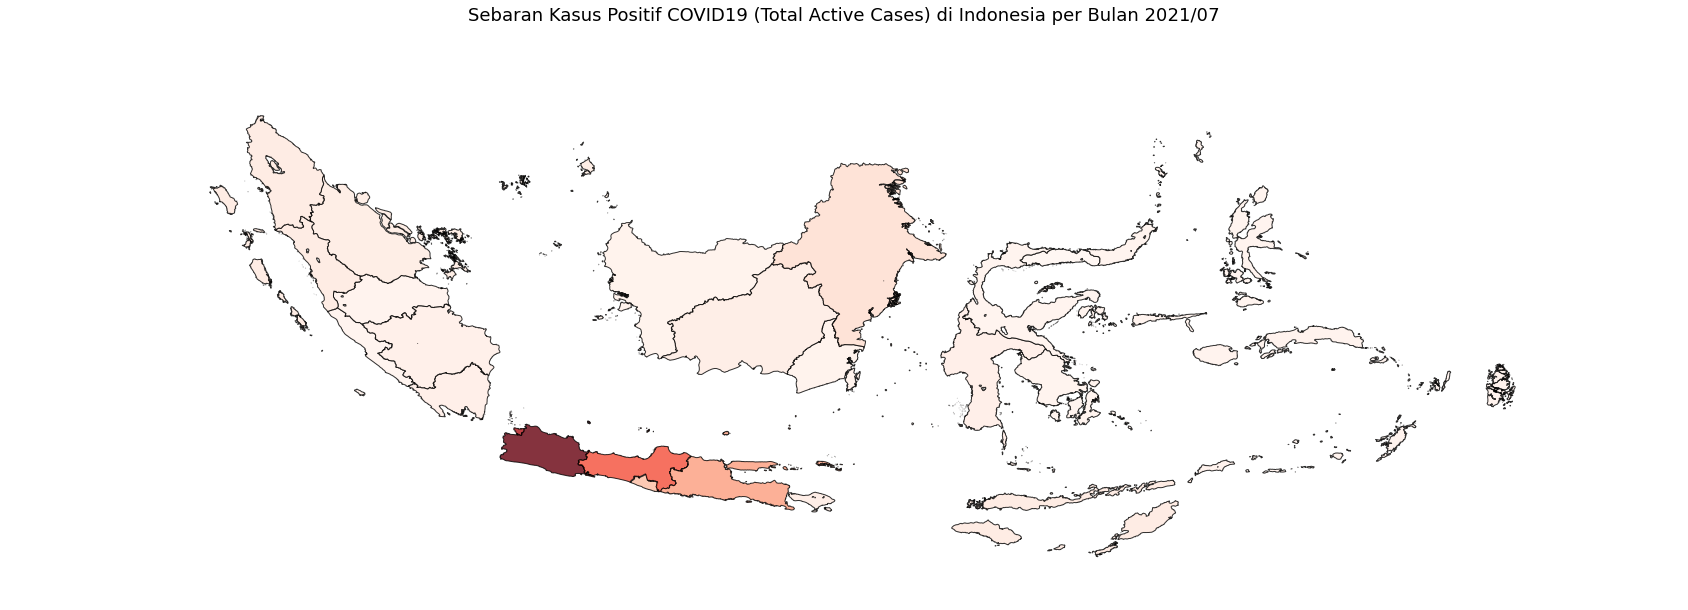

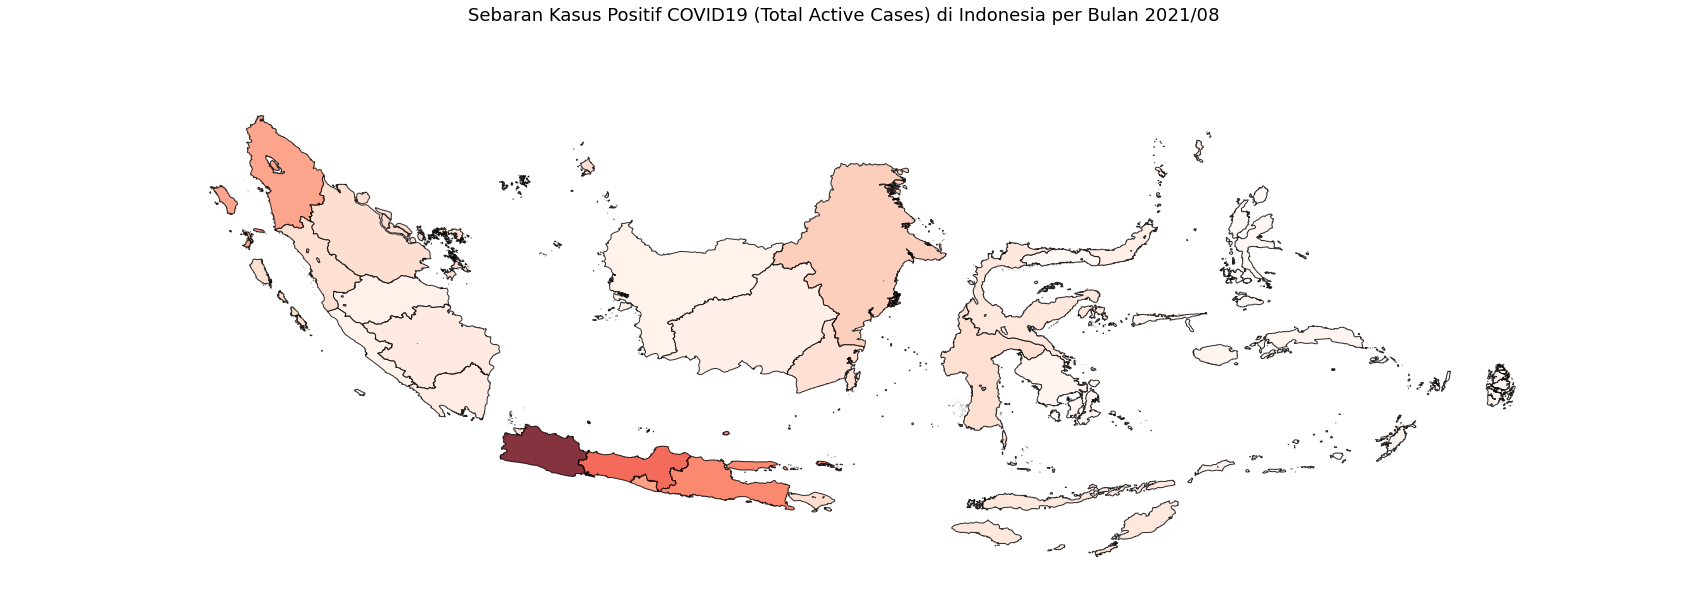

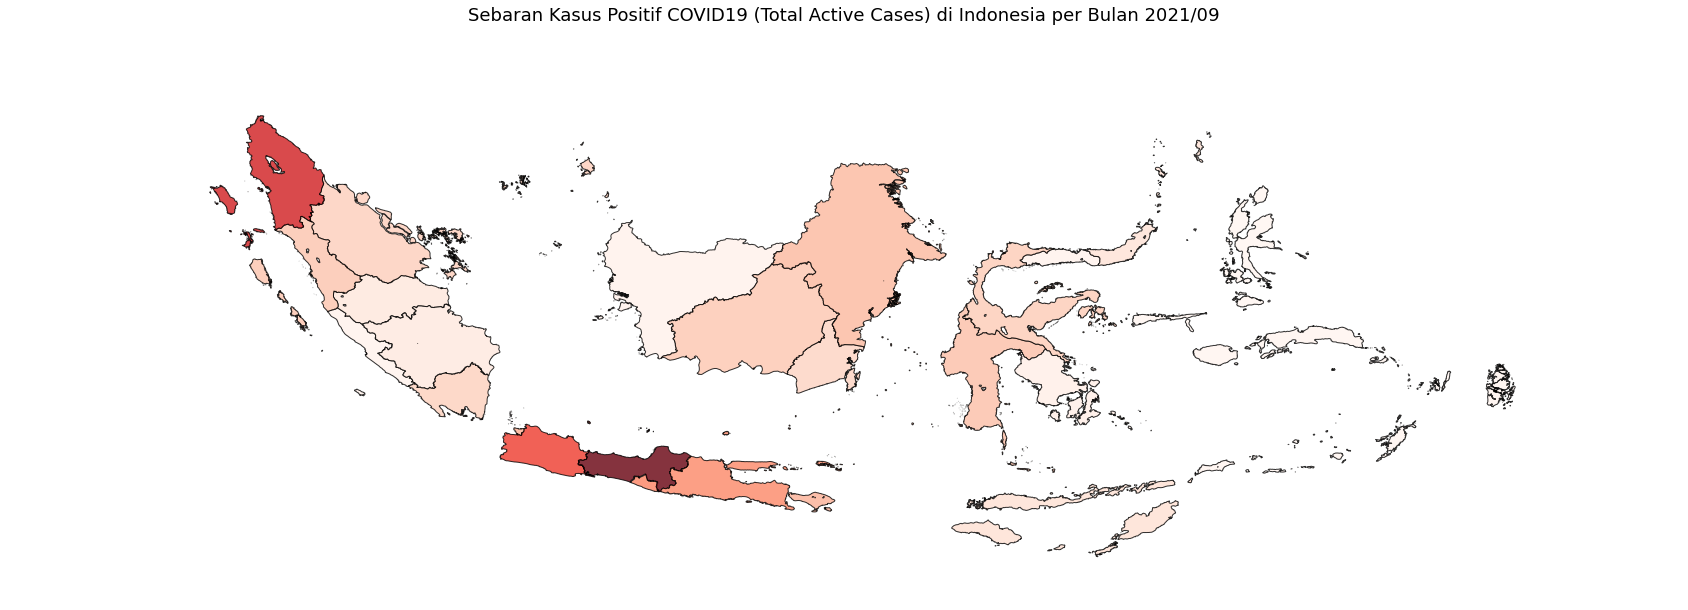

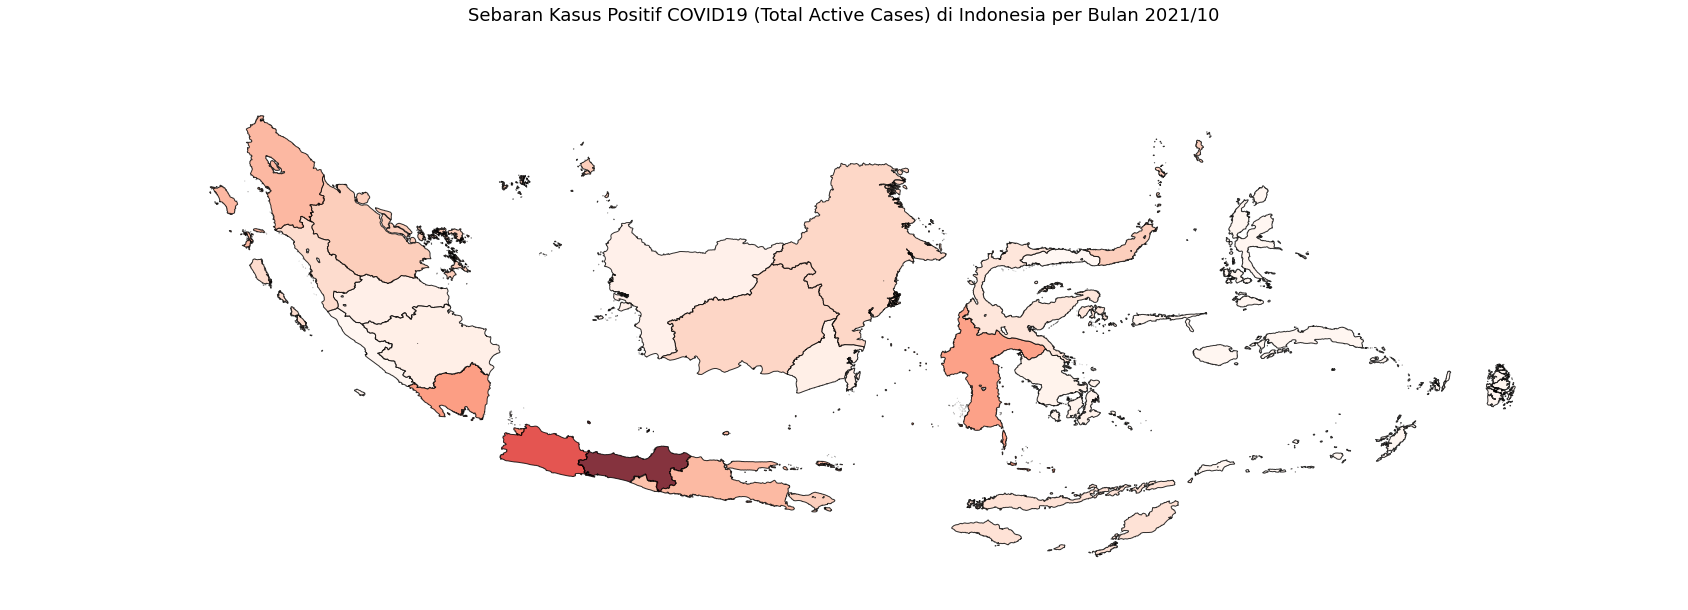

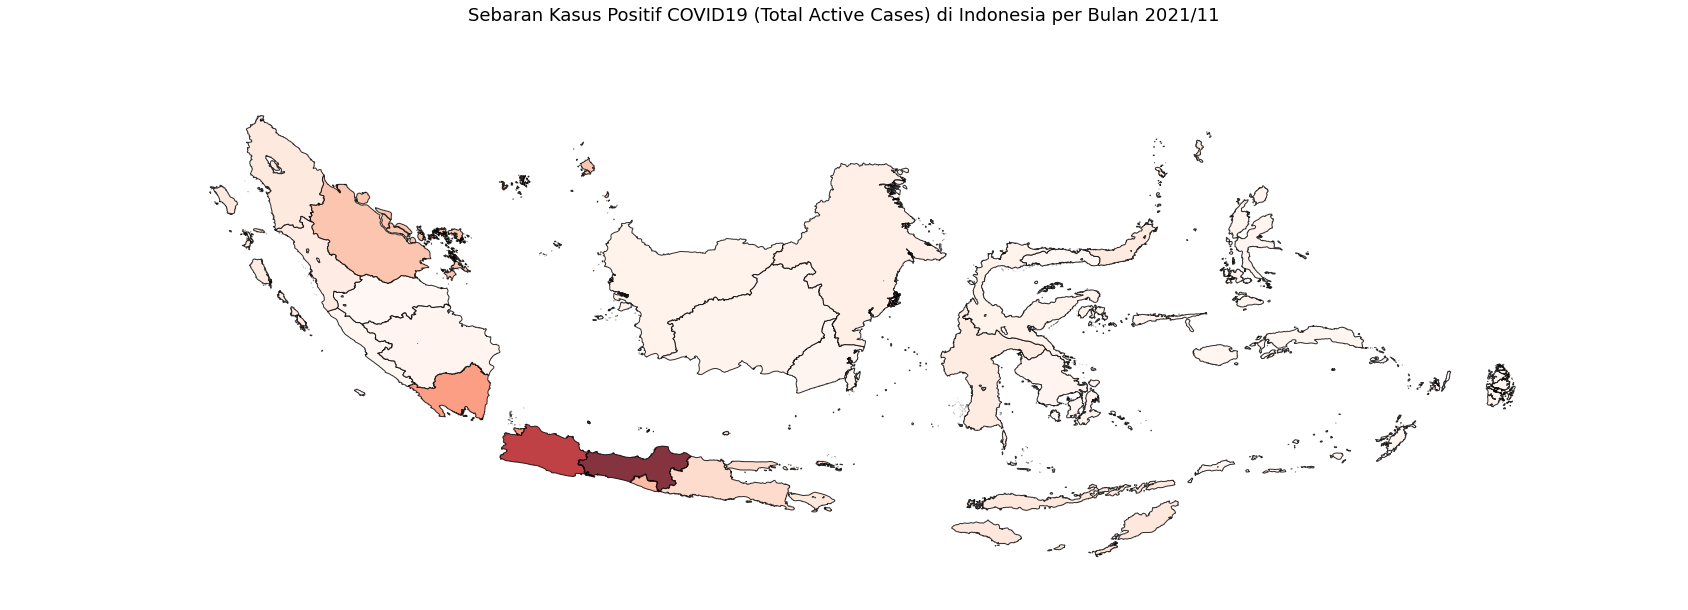

In [44]:
image_files= []
anim_path = pathlib.Path("anim/")
anim_path.mkdir(parents=True, exist_ok=True)
i=0
covid19_ind = GeoDataFrame(covid19_ind)
for date in date_set:
    i+=1
    pandas_temp = covid19_ind[covid19_ind["YearMonth"] == date]
    ax = gplt.choropleth(
    pandas_temp,
    hue= "Total Active Cases",
    edgecolor="black",
    linewidth=1,
    cmap="Reds",
    alpha = 0.8,
    projection=gcrs.AlbersEqualArea(),
    figsize=(30, 30)
    )
    
    ax.set_title(
    f"Sebaran Kasus Positif COVID19 (Total Active Cases) di Indonesia per Bulan {date}",
    fontsize=18
    )
    file_name = str(anim_path / "{}.png".format(i))
    plt.savefig(file_name, bbox_inches="tight", pad_inches=0.1)
    image_files.append(file_name)

# **Visualisasi Geospasial (Choropleth Map) Animasi GIF**

In [45]:
images = []

for file_name in image_files:
    images.append(imageio.imread(file_name))

gif_path = "movie.gif"
imageio.mimsave(gif_path, images, fps=2)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16536\1795475433.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(file_name))


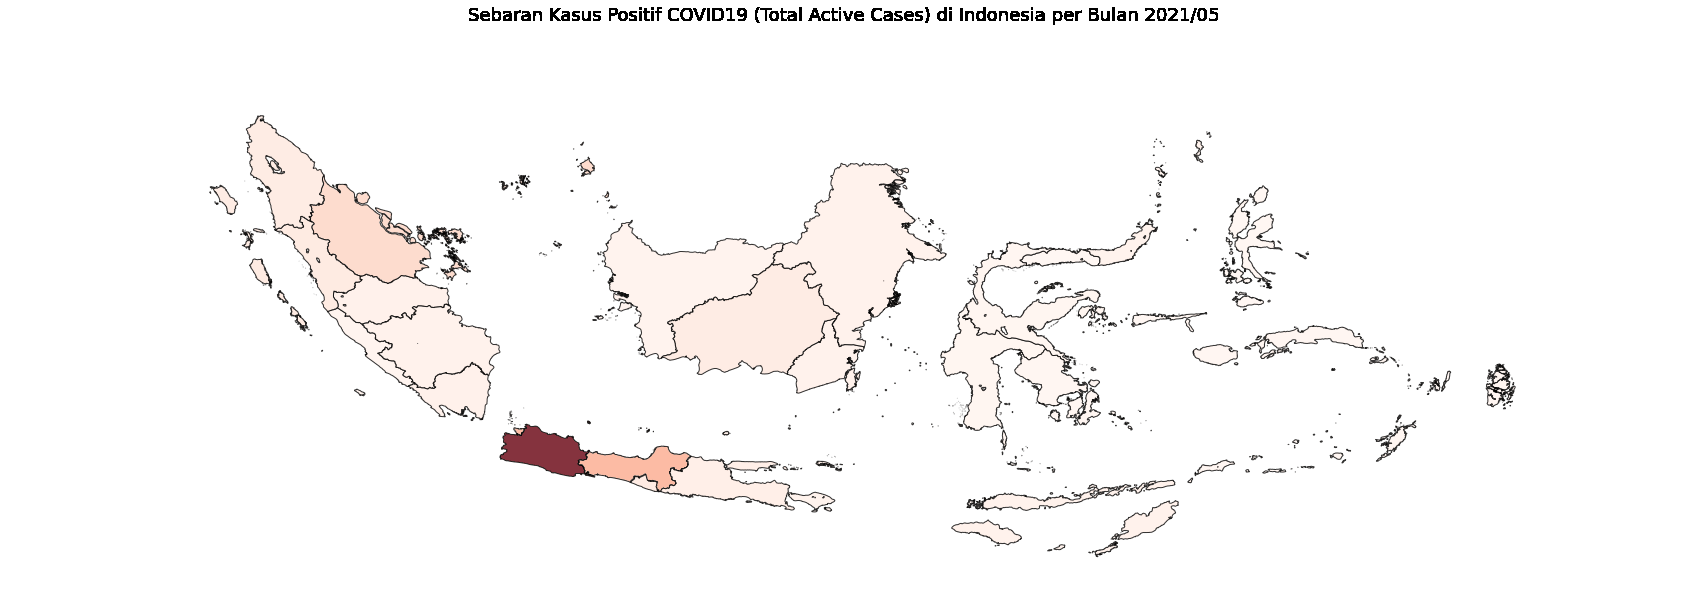

In [48]:
Image(open('movie.gif','rb').read())